#Importing Modules

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Importing, Splitting and Preprocessing the Data

In [2]:
dataset = tf.keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#Creating and Training the Model

In [5]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(units=128, activation='relu'),
                             tf.keras.layers.Dense(units=10, activation='softmax')])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4973 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3714 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3359 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3104 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2917 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2787 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2555 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2452 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2354 - accurac

#Evaluating the model

In [7]:
model.evaluate(test_images,  test_labels)

 79/313 [======>.......................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8837

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 [==============================] - 1s 1ms/step - loss: 0.3370 - accuracy: 0.8801


[0.33698776364326477, 0.8801000118255615]

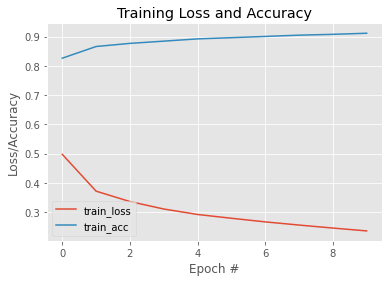

In [8]:
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

plt.show()

#Inferecing

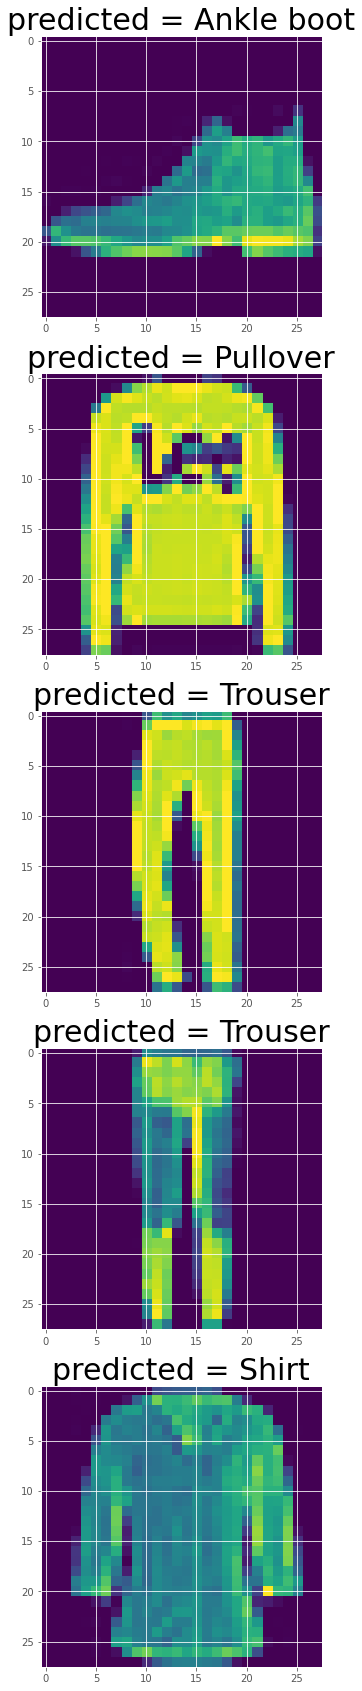

In [9]:
predictions = model.predict_on_batch(test_images[:5])

fig, axs = plt.subplots(5,figsize=(30,30))
for i in range(5):
  axs[i].imshow(test_images[i])
  text = 'predicted = '+str(class_names[np.argmax(predictions[i])])
  axs[i].set_title(text,size=30)
  fig.show()